In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import files

In [3]:
stations = pd.read_csv('Seattle_cycles_station.csv')

In [4]:
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [5]:
# imported trips .csv file
trips = pd.read_csv('Seattle_cycles_trip.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3756\3865890828.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('Seattle_cycles_trip.csv')


In [6]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


# Find out count of what trips started at what station

In [6]:
# To find out count of trips started at what station
start_trip = trips[
    ['trip_id','from_station_name']
].groupby('from_station_name').count().rename(
    columns={'trip_id': 'trip_count'})
start_trip

,trip_count
from_station_name,
12th Ave & E Denny Way,3837
12th Ave & E Mercer St,6322
12th Ave & E Yesler Way,958
12th Ave & NE Campus Pkwy,3630
15th Ave E & E Thomas St,7680
...,...
UW Intramural Activities Building,1848
UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,1398
UW McCarty Hall / Whitman Ct,752


In [5]:
start_trip.to_csv('start_trip.csv')

In [7]:
# trips ordered decending value
start_trip_ordered = start_trip.sort_values(by='from_station_name')
start_trip_ordered

,trip_count
from_station_name,
12th Ave & E Denny Way,3837
12th Ave & E Mercer St,6322
12th Ave & E Yesler Way,958
12th Ave & NE Campus Pkwy,3630
15th Ave E & E Thomas St,7680
...,...
UW Intramural Activities Building,1848
UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,1398
UW McCarty Hall / Whitman Ct,752


# Find out count of trips finishing at what station

In [8]:
# To find out count of trips finishing at what station
end_trip = trips[
    ['trip_id','to_station_name']
].groupby('to_station_name').count().rename(
    columns={'trip_id': 'trip_count'})
end_trip

,trip_count
to_station_name,
12th Ave & E Denny Way,1234
12th Ave & E Mercer St,2419
12th Ave & E Yesler Way,868
12th Ave & NE Campus Pkwy,4807
15th Ave E & E Thomas St,2391
...,...
UW Intramural Activities Building,2050
UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,1956
UW McCarty Hall / Whitman Ct,644


In [7]:
end_trip.to_csv('end_trip.csv')

In [9]:
# trips ordered decending value
end_trip_ordered = end_trip.sort_values(by='to_station_name')
end_trip_ordered

,trip_count
to_station_name,
12th Ave & E Denny Way,1234
12th Ave & E Mercer St,2419
12th Ave & E Yesler Way,868
12th Ave & NE Campus Pkwy,4807
15th Ave E & E Thomas St,2391
...,...
UW Intramural Activities Building,2050
UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,1956
UW McCarty Hall / Whitman Ct,644


In [20]:
trips2 = trips.value_counts('from_station_name').reset_index(name='start_trips').rename(columns = {'from_station_name': 'station'})
trips2.head()

,station,start_trips
0,Pier 69 / Alaskan Way & Clay St,13054
1,E Pine St & 16th Ave,11392
2,3rd Ave & Broad St,10934
3,2nd Ave & Pine St,10049
4,Westlake Ave & 6th Ave,9994


In [21]:
trips3 = trips.value_counts('to_station_name').reset_index(name='end_trips').rename(columns = {'to_station_name': 'station'})
trips3.head()

,station,end_trips
0,2nd Ave & Pine St,13784
1,Pier 69 / Alaskan Way & Clay St,13736
2,Westlake Ave & 6th Ave,10962
3,3rd Ave & Broad St,10737
4,PATH / 9th Ave & Westlake Ave,10632


In [23]:
alltrips = pd.merge(trips2, trips3, how='left', on='station')
alltrips.head()

,station,start_trips,end_trips
0,Pier 69 / Alaskan Way & Clay St,13054,13736
1,E Pine St & 16th Ave,11392,3408
2,3rd Ave & Broad St,10934,10737
3,2nd Ave & Pine St,10049,13784
4,Westlake Ave & 6th Ave,9994,10962


In [24]:
alltrips['difference'] = alltrips['start_trips'] - alltrips['end_trips']

In [25]:
alltrips

,station,start_trips,end_trips,difference
0,Pier 69 / Alaskan Way & Clay St,13054,13736,-682
1,E Pine St & 16th Ave,11392,3408,7984
2,3rd Ave & Broad St,10934,10737,197
3,2nd Ave & Pine St,10049,13784,-3735
4,Westlake Ave & 6th Ave,9994,10962,-968
...,...,...,...,...
56,UW McCarty Hall / Whitman Ct,752,644,108
57,Pier 66 / Alaskan Way & Bell St,160,167,-7
58,8D OPS 02,2,2,0
59,Pronto shop 2,2,5,-3


In [26]:
alltrips.to_csv('alltrips.csv')

# Visualisations

C:\Users\Admin\AppData\Local\Temp\ipykernel_5180\1234337908.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(start_trip_ordered.index, rotation=90)


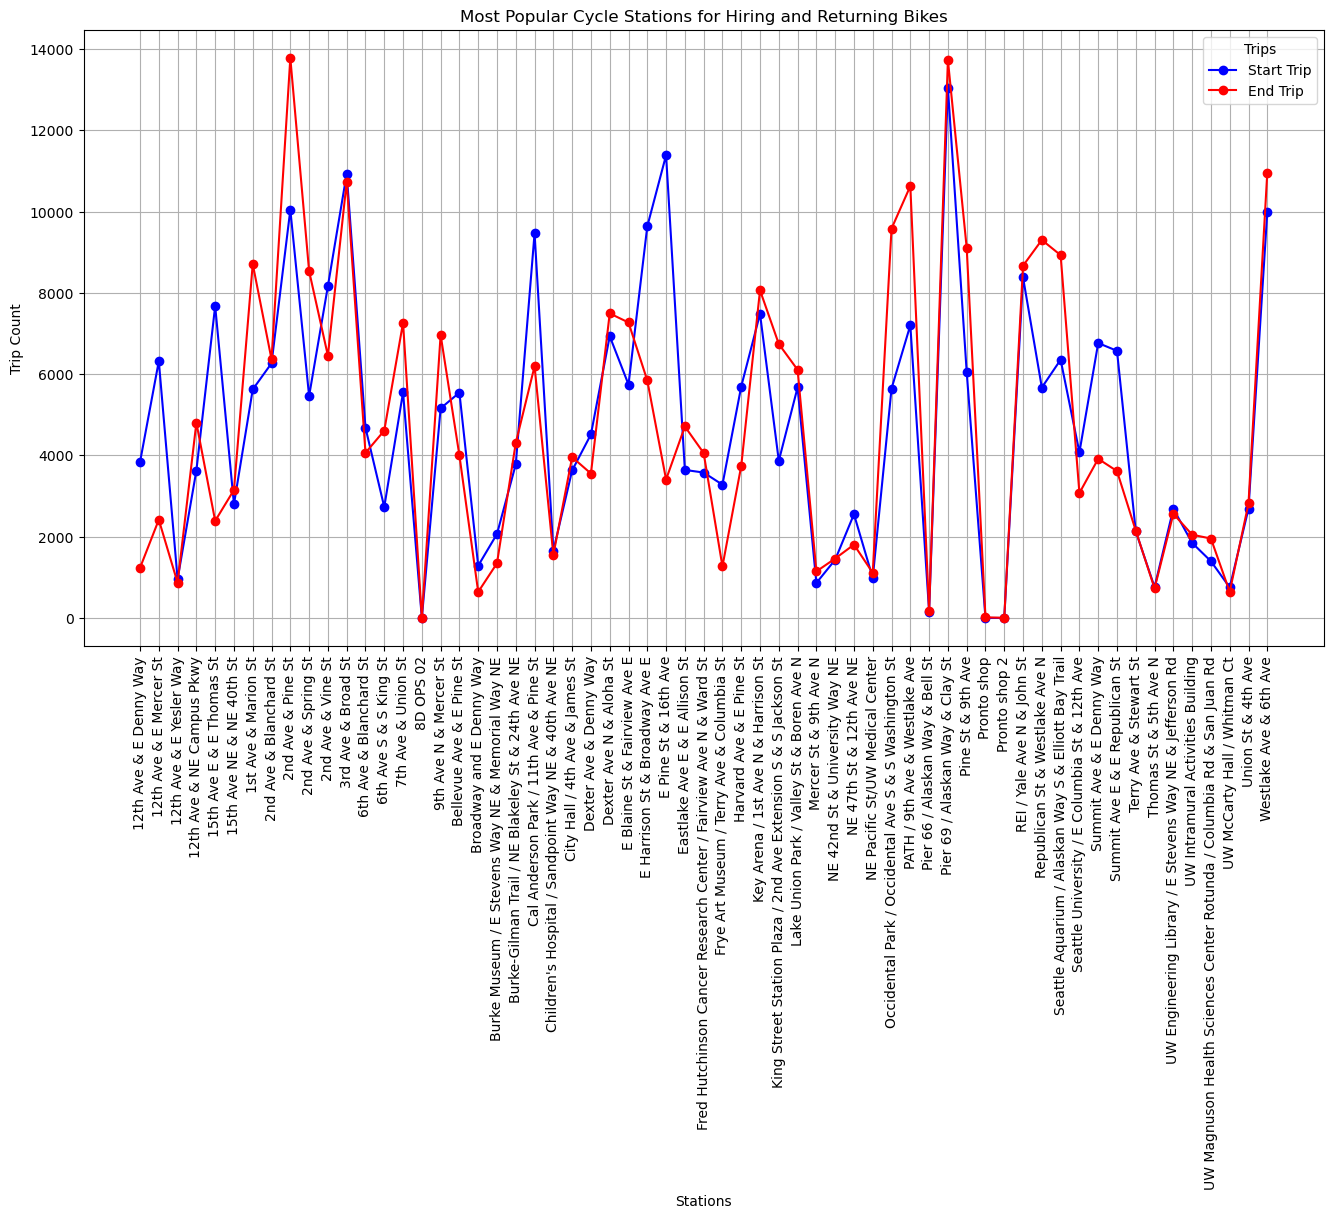

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(start_trip_ordered, c='b', marker='o', label='Start Trip')
ax.plot(end_trip_ordered, c='r', marker='o', label='End Trip')
ax.set_xlabel('Stations')
ax.set_ylabel('Trip Count')
ax.set_xticklabels(start_trip_ordered.index, rotation=90)
ax.legend(loc='best', title='Trips')
ax.set_title('Most Popular Cycle Stations for Hiring and Returning Bikes', size='large')
plt.grid(True)
plt.show()

In [ ]:
plt.savefig('start_and')

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(start_trip_ordered, c='b', label='Start Trip')
ax.set_xlabel('Stations')
ax.set_ylabel('Trip Count')
ax2 = ax.twinx()
ax2.plot(end_trip_ordered, c='r', label='End Trip')
ax2.set_xlabel('Stations')
ax2.set_ylabel('Trip Count')
ax.legend(loc='best', title='Trips')
plt.show()

# Separate date and time

In [8]:
# creating separate date and time columns
trips['Dates'] = pd.to_datetime(trips['starttime']).dt.date
trips['Hour'] = pd.to_datetime(trips['starttime']).dt.hour
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,Dates,Hour
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960,2014-10-13,10
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970,2014-10-13,10
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988,2014-10-13,10
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977,2014-10-13,10
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971,2014-10-13,10


In [113]:
 trips['Dates']

0         2014-10-13
1         2014-10-13
2         2014-10-13
3         2014-10-13
4         2014-10-13
             ...    
286853    2016-08-31
286854    2016-08-31
286855    2016-08-31
286856    2016-08-31
286857    2016-08-31
Name: Dates, Length: 286858, dtype: object

In [9]:
# change date column to month and year
trips['Dates'] = pd.to_datetime(trips['Dates']).dt.to_period('M')

In [10]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,Dates,Hour
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960,2014-10,10
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970,2014-10,10
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988,2014-10,10
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977,2014-10,10
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971,2014-10,10


# Breakdown trips by month

In [54]:
# count of trips done in months
monthly_trips = trips[
    ['from_station_name', 'Dates']
].groupby('Dates').count().rename(
        columns={'from_station_name': 'Number of Trips'})
monthly_trips

,Number of Trips
Dates,
2014-10,13170
2014-11,15646
2014-12,11662
2015-01,14736
2015-02,14660
2015-03,19960
2015-04,18774
2015-05,15548
2015-06,15999


In [62]:
monthly_trips.index = monthly_trips.index.astype(str)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\4013276227.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_trips.index, rotation=30)


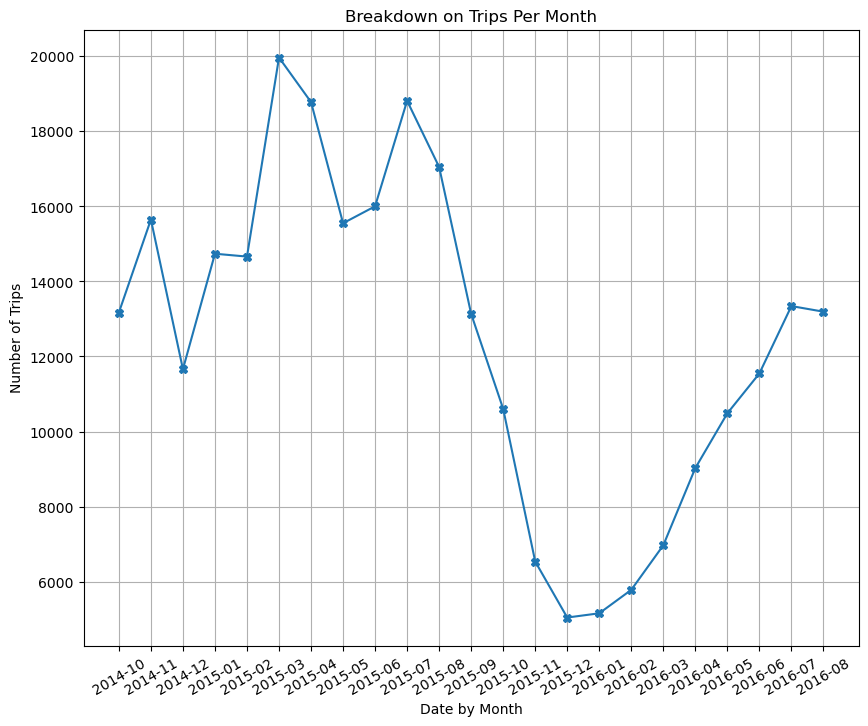

In [81]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(monthly_trips, marker='X')
ax.set_xlabel('Date by Month')
ax.set_ylabel('Number of Trips')
ax.set_title('Breakdown on Trips Per Month')
ax.set_xticklabels(monthly_trips.index, rotation=30)
ax.grid(True)
plt.show()

In [12]:
# break down main dataframe into 2 columns
monthly_trips_2 = trips[['from_station_name', 'Dates']]
monthly_trips_2

,from_station_name,Dates
0,2nd Ave & Spring St,2014-10
1,2nd Ave & Spring St,2014-10
2,2nd Ave & Spring St,2014-10
3,2nd Ave & Spring St,2014-10
4,2nd Ave & Spring St,2014-10
...,...,...
286853,Harvard Ave & E Pine St,2016-08
286854,Cal Anderson Park / 11th Ave & Pine St,2016-08
286855,Cal Anderson Park / 11th Ave & Pine St,2016-08
286856,Cal Anderson Park / 11th Ave & Pine St,2016-08


In [13]:
MT = monthly_trips_2.groupby(['from_station_name', 'Dates']).size()
MT

from_station_name       Dates  
12th Ave & E Denny Way  2014-10    180
                        2014-11    200
                        2014-12    234
                        2015-01     84
                        2015-02    136
                                  ... 
Westlake Ave & 6th Ave  2016-04    325
                        2016-05    402
                        2016-06    360
                        2016-07    434
                        2016-08    460
Length: 1209, dtype: int64

In [14]:
MT_table = MT.to_frame().reset_index()
MT_table

,from_station_name,Dates,0
0,12th Ave & E Denny Way,2014-10,180
1,12th Ave & E Denny Way,2014-11,200
2,12th Ave & E Denny Way,2014-12,234
3,12th Ave & E Denny Way,2015-01,84
4,12th Ave & E Denny Way,2015-02,136
...,...,...,...
1204,Westlake Ave & 6th Ave,2016-04,325
1205,Westlake Ave & 6th Ave,2016-05,402
1206,Westlake Ave & 6th Ave,2016-06,360
1207,Westlake Ave & 6th Ave,2016-07,434


# Breakdown trips by hour

In [15]:
# break down main dataframe into 2 columns
hourly_trips = trips[['from_station_name', 'Hour']]
hourly_trips

,from_station_name,Hour
0,2nd Ave & Spring St,10
1,2nd Ave & Spring St,10
2,2nd Ave & Spring St,10
3,2nd Ave & Spring St,10
4,2nd Ave & Spring St,10
...,...,...
286853,Harvard Ave & E Pine St,23
286854,Cal Anderson Park / 11th Ave & Pine St,23
286855,Cal Anderson Park / 11th Ave & Pine St,23
286856,Cal Anderson Park / 11th Ave & Pine St,23


In [16]:
# break down 2 colums further to show how many bikes hired per hour, per station
HT = hourly_trips.groupby(['from_station_name', 'Hour']).size()
print(HT)

from_station_name       Hour
12th Ave & E Denny Way  0        13
                        1        10
                        2        12
                        3         3
                        4         3
                               ... 
Westlake Ave & 6th Ave  19      468
                        20      273
                        21      212
                        22      269
                        23       77
Length: 1355, dtype: int64


In [18]:
# puts the above into a dataframe
HT_table = HT.to_frame().reset_index()

In [19]:
HT_table

,from_station_name,Hour,0
0,12th Ave & E Denny Way,0,13
1,12th Ave & E Denny Way,1,10
2,12th Ave & E Denny Way,2,12
3,12th Ave & E Denny Way,3,3
4,12th Ave & E Denny Way,4,3
...,...,...,...
1350,Westlake Ave & 6th Ave,19,468
1351,Westlake Ave & 6th Ave,20,273
1352,Westlake Ave & 6th Ave,21,212
1353,Westlake Ave & 6th Ave,22,269


In [24]:
# count of trips done in hours
HT2 = trips[
    ['from_station_name', 'Hour']
].groupby('Hour').count().rename(
    columns = {'from_station_name': 'Number of Trips'})
HT2

,Number of Trips
Hour,
0,1926
1,1245
2,943
3,506
4,709
5,1715
6,3867
7,12731
8,23603


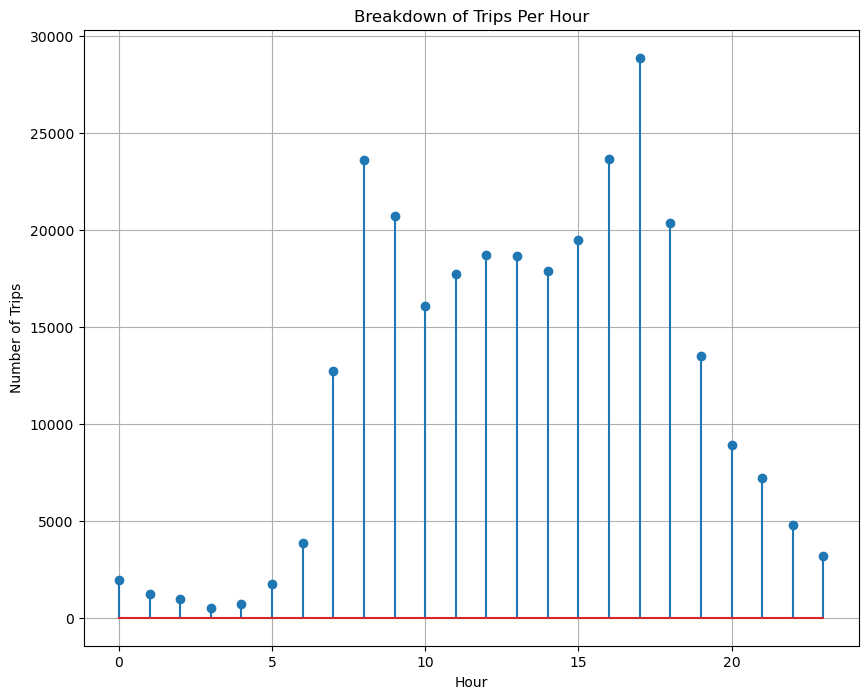

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
ax.stem(HT2)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Trips')
ax.set_title('Breakdown of Trips Per Hour')
plt.grid(True)
plt.show()